Environnement de test et de développement !



Import libraries

In [1]:
import numpy as np
import numpy.random as rd

In [49]:
def init_part(N,T,velocity=True,acceleration=False):
    '''
    Generate N particules in the boxes with random position, velocity and acceleration. Without override.
    Array in the shape (N,3,3,T) part[i,j,k,t] : particle i, position/speed/accelration j, axe x,y,z k, T time
    '''
    part = np.zeros((N,3,3,len(T)))
    for k in range(N):
        pos = np.array([rd.rand(),rd.rand(),rd.rand()])
        vel = np.array([rd.rand(),rd.rand(),rd.rand()])
        acc = np.array([rd.rand(),rd.rand(),rd.rand()])
        while pos in part:
            pos = np.array([rd.rand(),rd.rand(),rd.rand()])
        part[k,0,:,0] = pos
        if velocity==True:
            part[k,0,:,1] = part[k,0,:,0] + vel*(T[1]-T[0])
        if acceleration==True:
            part[k,2,:,0] = acc
        
    return part

def f_lj(E_0,d,part,i,j,t):
    '''
    Return the force per unit of mass inducted by the Lennard Jones potential between 2 particles i,j and the normalized vector. F_i->j . n
    '''
    dr = np.linalg.norm(part[i,0,:,t] - part[j,0,:,t])
    n = (part[j,0,:,t] - part[i,0,:,t])/dr
    F = - 4 * E_0/dr *((-12 * (d/dr)**12 + 6 * (d/dr)**6))
    return(F,n)

def F_lj(E_0,d,part,i,t):
    F = np.zeros(3)
    n_part = np.arange(np.shape(part)[0])
    n_part= np.delete(n_part,[i])
    for j in n_part:
        f,n = f_lj(E_0,d,part,i,j,t)
        F += f*n
    return F
def verlet(part,E_0,d,T):
    '''
    ttt
    '''
    for t in range(len(T)-1):
        for i in range(np.shape(part)[0]):
            part[i,0,:,t+1] = ((2*part[i,0,:,t] - part[i,0,:,t-1] + F_lj(E_0,d,part,i,t)))%(np.array([1,1,1])) # % permet d'avoir les conditions périodiques !
    return(part)


In [123]:
N = 10
eta = 1000
T = np.linspace(0,1,eta)

d = 0.3405e-9 #Argon
L = 10*d #d
L_cu = 1
d_cu = d*L_cu/L #L_cu = 1 
E_0 = 1 #Argon


part = init_part(N,T,velocity=False)
part = verlet(part,E_0,d_cu,T)

C:\Users\elies\AppData\Local\Temp\ipykernel_2688\3396466989.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while pos in part:


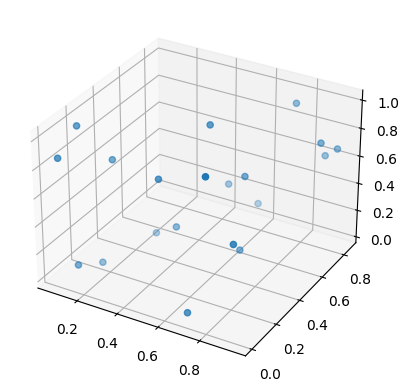

In [104]:
import matplotlib.pyplot as plt
t=5
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(part[:,0,0,t],part[:,0,1,t],part[:,0,2,t])
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


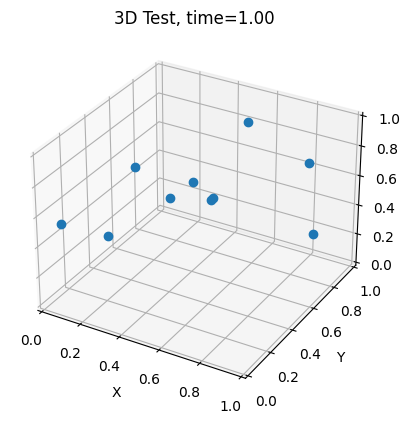

In [124]:
from operator import le
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd

t = np.array([np.ones(N)*i for i in T]).flatten()
df = pd.DataFrame({"time": t ,"x" : part[:,0,0,:].flatten(), "y" : part[:,0,1,:].flatten(), "z" : part[:,0,2,:].flatten()})

def update_graph(num):
    data=df[df['time']==num]
    graph.set_data (data.x, data.y)
    graph.set_3d_properties(data.z)
    title.set_text(f"3D Test, time={num:.2f}")
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')
ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')
ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')
ax.set_title('3D Test')

data=df[df['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="o")

anim = matplotlib.animation.FuncAnimation(fig, update_graph, T, 
                               interval=200, blit=True)

anim.save('test2.gif')
